In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('deforestation.csv')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
categorical_features = ['Region', 'Country']
df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Tile ID                           1100 non-null   object        
 1   Image ID                          1100 non-null   object        
 2   Date                              1100 non-null   datetime64[ns]
 3   Region                            1100 non-null   object        
 4   Country                           1100 non-null   object        
 5   Biome Type                        1100 non-null   object        
 6   Latitude                          1100 non-null   float64       
 7   Longitude                         1100 non-null   float64       
 8   Elevation (m)                     1100 non-null   float64       
 9   Slope (°)                         1100 non-null   float64       
 10  Rainfall (mm)                     1100 non-null 

In [7]:
print(df.head())

  Tile ID        Image ID       Date       Region Country  \
0   T0001  T0001_20240101 2024-01-01  Congo Basin     DRC   
1   T0001  T0001_20240201 2024-02-01  Congo Basin     DRC   
2   T0001  T0001_20240301 2024-03-01  Congo Basin     DRC   
3   T0001  T0001_20240401 2024-04-01  Congo Basin     DRC   
4   T0001  T0001_20240501 2024-05-01  Congo Basin     DRC   

            Biome Type  Latitude  Longitude  Elevation (m)  Slope (°)  ...  \
0  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   
1  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   
2  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   
3  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   
4  Tropical Rainforest  -3.07997   17.87613          488.1        2.8  ...   

   Distance to River (km)  Protected Area (1=Yes,0=No)  \
0                     6.1                            0   
1                     6.1                       

In [8]:
print(df.isnull().sum())

Tile ID                             0
Image ID                            0
Date                                0
Region                              0
Country                             0
Biome Type                          0
Latitude                            0
Longitude                           0
Elevation (m)                       0
Slope (°)                           0
Rainfall (mm)                       0
Temperature (°C)                    0
Cloud Cover (%)                     0
Fire Alerts (7d)                    0
NDVI (Vegetation Index)             0
NDMI (Moisture Index)               0
EVI (Enhanced Vegetation Index)     0
Tree Cover (%)                      0
Canopy Height (m)                   0
Distance to Road (km)               0
Distance to Settlement (km)         0
Distance to River (km)              0
Protected Area (1=Yes,0=No)         0
Logging Concession (1=Yes,0=No)     0
Population Density (per km²)        0
Forest Loss Last 3Y (%)             0
Cumulative D

In [9]:
sns.set_style("whitegrid")

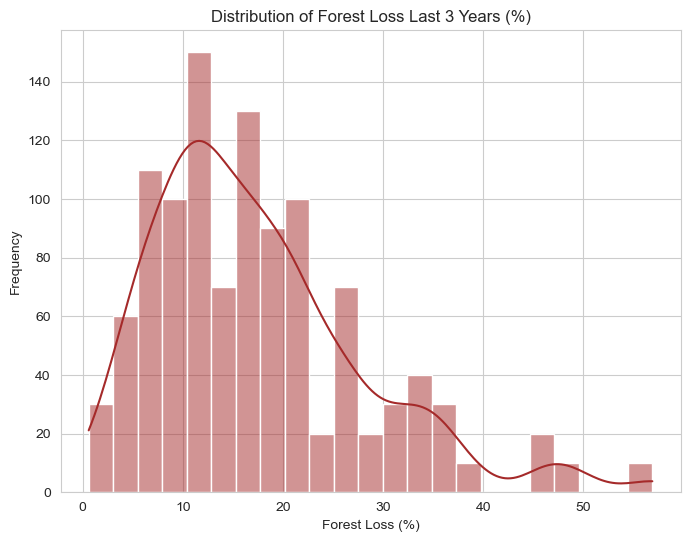

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df_processed['Forest Loss Last 3Y (%)'], kde=True, color= 'Brown')
plt.title('Distribution of Forest Loss Last 3 Years (%)')
plt.xlabel('Forest Loss (%)')
plt.ylabel('Frequency')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1324\1644327638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Deforestation Event (Yes=1,No=0)', data=df_processed, palette='coolwarm')


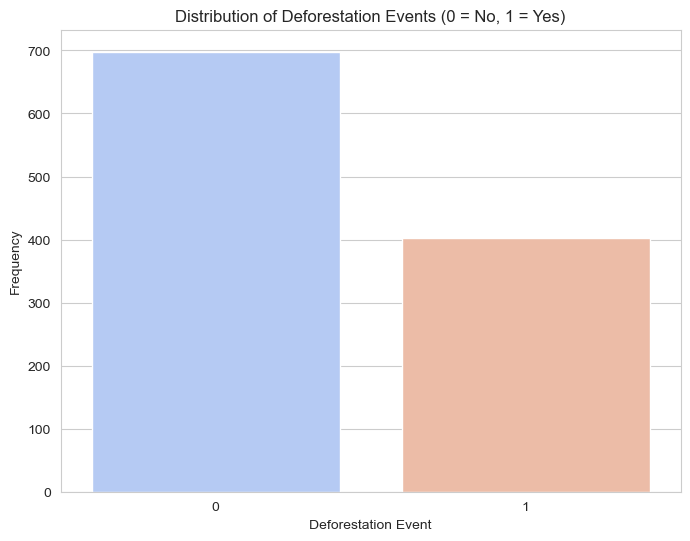

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Deforestation Event (Yes=1,No=0)', data=df_processed, palette='coolwarm')
plt.title('Distribution of Deforestation Events (0 = No, 1 = Yes)')
plt.xlabel('Deforestation Event')
plt.ylabel('Frequency')
plt.show()

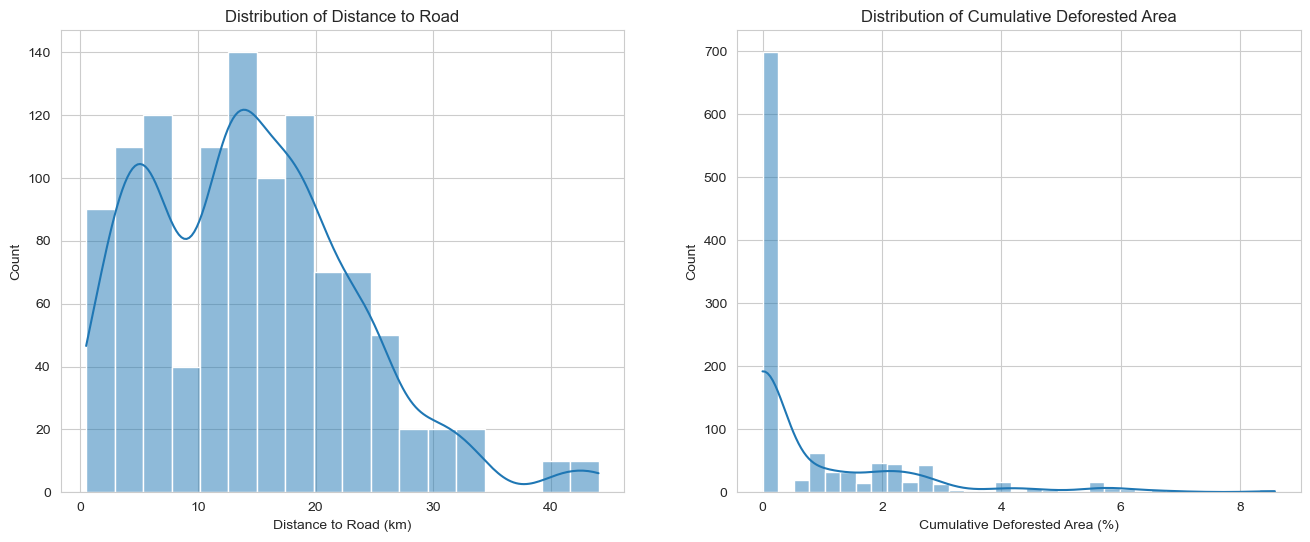

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df_processed['Distance to Road (km)'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Distance to Road')
sns.histplot(df_processed['Cumulative Deforested Area (%)'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cumulative Deforested Area')
plt.show()

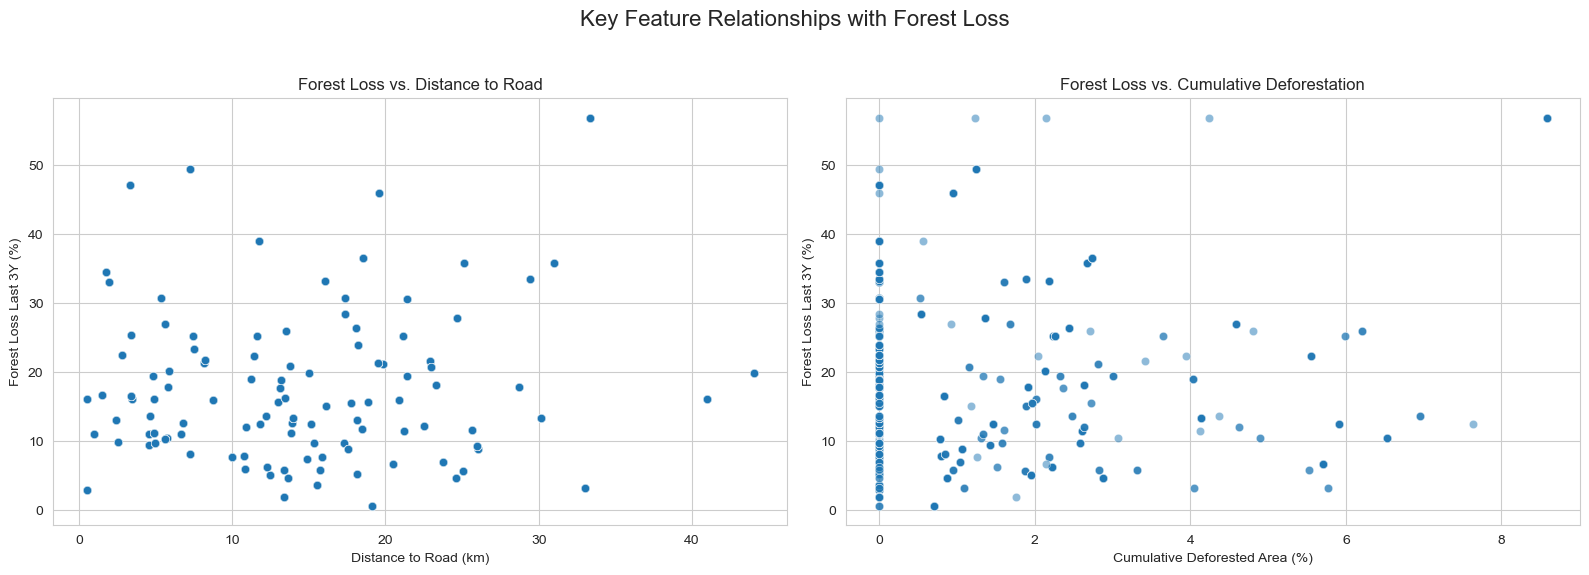

In [13]:
fig,axes = plt.subplots(1,2, figsize=(16,6))
fig.suptitle('Key Feature Relationships with Forest Loss',fontsize=16)
sns.scatterplot(x='Distance to Road (km)', y='Forest Loss Last 3Y (%)', data=df_processed, ax=axes[0], alpha=0.5)
axes[0].set_title('Forest Loss vs. Distance to Road')
sns.scatterplot(x='Cumulative Deforested Area (%)', y='Forest Loss Last 3Y (%)', data=df_processed, ax=axes[1], alpha=0.5)
axes[1].set_title('Forest Loss vs. Cumulative Deforestation')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
train_df = df_processed[df_processed['Dataset Split'] == 'train']
test_df = df_processed[df_processed['Dataset Split'] == 'test']

In [15]:
TARGET = 'Deforestation Event (Yes=1,No=0)'

In [16]:
features_to_drop = [
    'Tile ID', 'Image ID', 'Date', 'Dataset Split', 'Image File Path',
    'Predicted Risk Score', 'Biome Type', TARGET
]

In [17]:
all_cols = train_df.columns
feature_cols = [col for col in all_cols if col not in features_to_drop]

In [18]:
X_train = train_df[feature_cols]
y_train = train_df[TARGET]
X_test = test_df[feature_cols]
y_test = test_df[TARGET]

In [19]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (770, 31)
Testing set shape: (220, 31)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
y_pred = log_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Deforestation', 'Deforestation']))
print("\nConfusion Matrix:")
print(cm)


Model Accuracy: 0.9727

Classification Report:
                  precision    recall  f1-score   support

No Deforestation       0.97      0.99      0.98       138
   Deforestation       0.97      0.95      0.96        82

        accuracy                           0.97       220
       macro avg       0.97      0.97      0.97       220
    weighted avg       0.97      0.97      0.97       220


Confusion Matrix:
[[136   2]
 [  4  78]]


In [23]:
predictions_df = pd.DataFrame({
    'Actual Deforestation Event': y_test.head(15).values,
    'Predicted Deforestation Event': y_pred[:15]
})
print(predictions_df.to_string(index=False))

 Actual Deforestation Event  Predicted Deforestation Event
                          0                              0
                          0                              0
                          0                              0
                          0                              0
                          0                              0
                          0                              0
                          1                              1
                          1                              1
                          1                              1
                          1                              1
                          0                              0
                          0                              0
                          0                              0
                          0                              0
                          0                              0


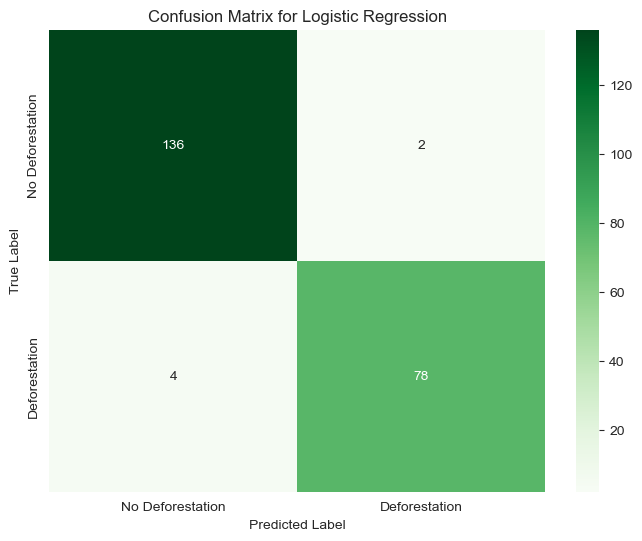

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Deforestation', 'Deforestation'],
            yticklabels=['No Deforestation', 'Deforestation'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1324\608966522.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coeff_df.head(15), palette='coolwarm')


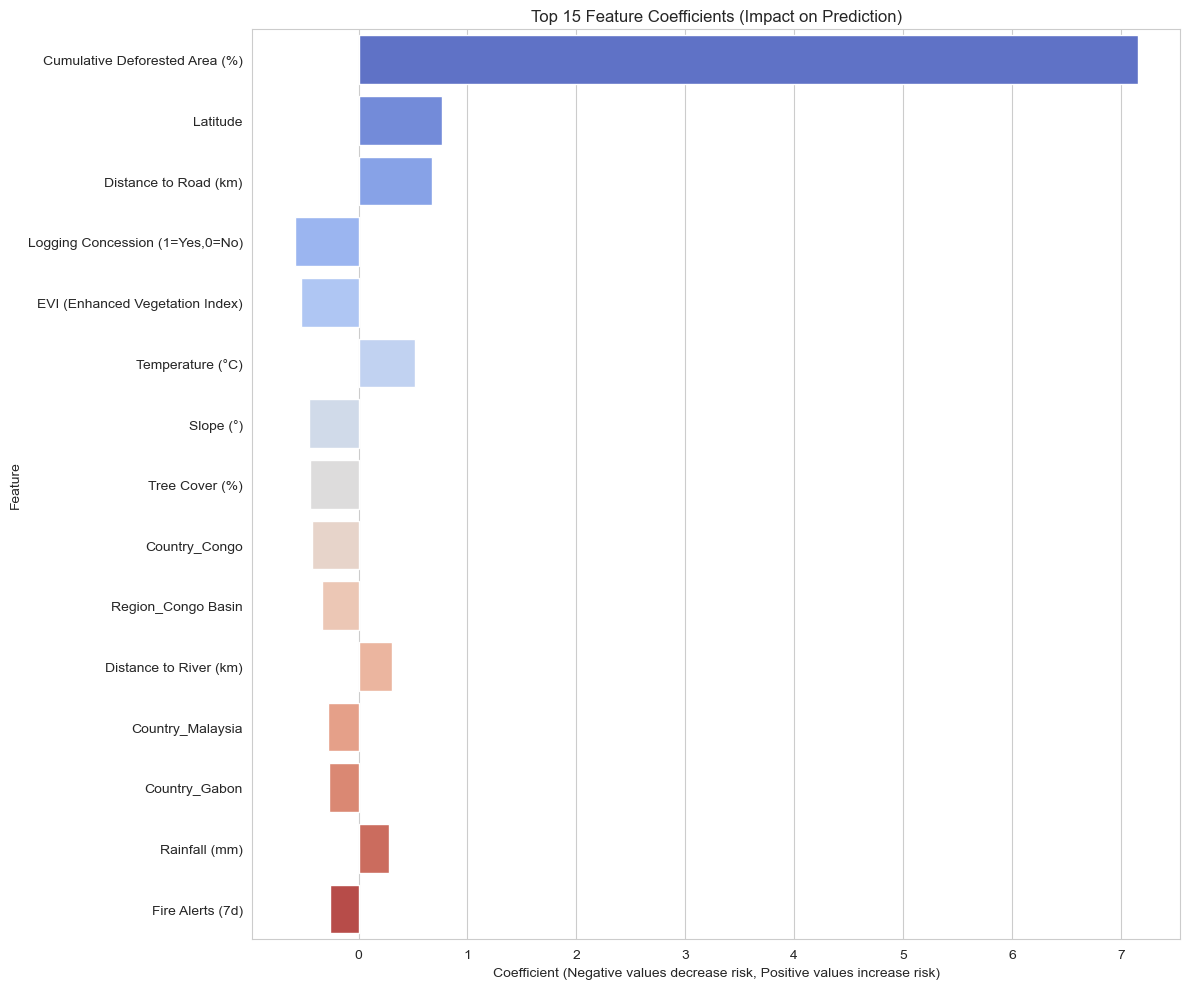

In [25]:
coefficients = log_model.coef_[0]
coeff_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients})
coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()
coeff_df = coeff_df.sort_values(by='abs_coefficient', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='coefficient', y='feature', data=coeff_df.head(15), palette='coolwarm')
plt.title('Top 15 Feature Coefficients (Impact on Prediction)')
plt.xlabel('Coefficient (Negative values decrease risk, Positive values increase risk)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()